# Ce TP est réalisé par le quadrinome :
   - Mekdoud Rachid
   - Mokhbat Selma
   - Kerdjoudj Mohamed
   - Hezouat Abdeldjalil

# TP 7 Machines à vecteur de support
Dans ce TP, nous aimerions explorer le classifieur machineà vecteurs de support. Nous essayerons d'utiliser plusieurs noyaux et voir la difference entre leur capacité de séparation. 

Pour ceci, nous utiliserons plusieurs ensembles de données.

# Importation des librairies necessaires au travail

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn import svm
from sklearn import preprocessing

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [19]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(863, 3)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques, la dernière colonne represente la classe de l'exemple (positive ou négative).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [20]:
# Notons que nous navons pas besoin d'intercept pour l'MVS de sklearn
X=data[:,:-1]
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [21]:
print('X', X.shape ,' y ', y.shape)

X (863, 2)  y  (863, 1)


Pas besoin aussi de transformer les étiquettes (labels) en vecteurs

# Entrainement 
Nous utiliserons ici une MVS avec differents noyaux:
- Linéaire
- Gaussien (RBF)
- Polyomial

In [22]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mettons un lien avec ce que nous avons appris en regression linéaire

In [23]:
w = svc.coef_ # equivalent de theta
b = svc.intercept_[0] # equivalent de theta0
print(w,b)

[[-1.0022449   3.64731176]] -1.8675905935006316


Affichons la ligne séparatrice de cette MVS linéaire

In [24]:
w[0,1]

3.6473117571179188

In [25]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = (-(w[0,0] * x1_min + b) / w[0,1]), (-(w[0,0] * x1_max + b) / w[0,1])
print(x1_min, x1_max ,x2_min, x2_max )
# nous utiliserons ces valeurs afin d'afficher les deux points du segment qui represente la limite de decision

0.044931 0.99885 0.5243923707042132 0.7865197989351704


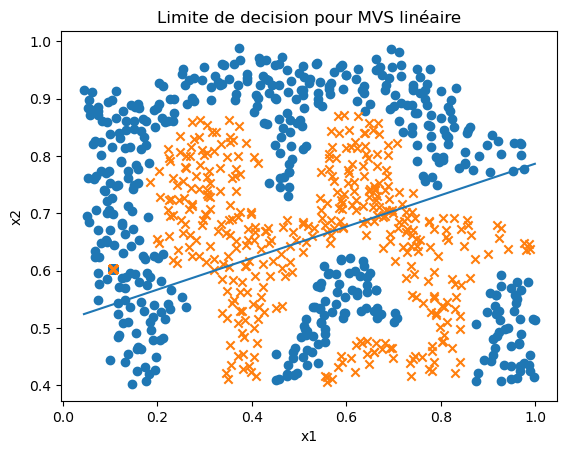

In [26]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Limite de decision pour MVS linéaire")

plt.plot([x1_min, x1_max], [x2_min, x2_max])

Affichons la limite de décision avec le noyau Gaussien

C:\Users\pc\AppData\Local\Temp\ipykernel_18784\402093759.py:9: UserWarning: No contour levels were found within the data range.
  plt.contour(a,b,z,0, colors='green', linewidth=2)
C:\Users\pc\AppData\Local\Temp\ipykernel_18784\402093759.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(a,b,z,0, colors='green', linewidth=2)


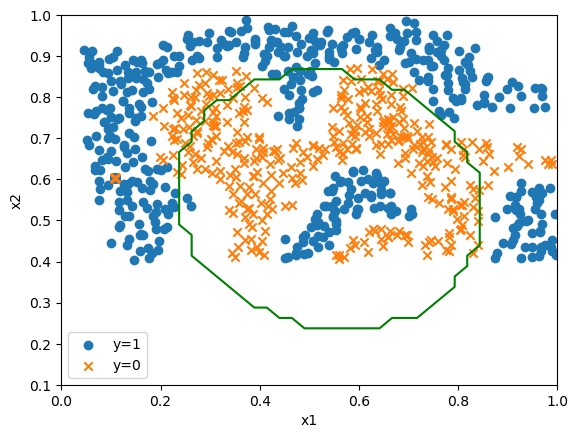

In [27]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
a = np.linspace(-1, 1.5, 100)
b = np.linspace(-1, 1.5, 100)
z = np.zeros((len(a), len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    z[i,j] = rbf_svc.predict(np.c_[a[i], b[j]])
plt.contour(a,b,z,0, colors='green', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis([0, 1, 0.1, 1])
#plt.axis([X[:, 0].min()-0.1, X[:, 0].max()+0.1, X[:, 1].min()-0.1, X[:, 1].max()+0.1])
plt.show()

Un autre ensemble de données pour la visualisation des vecteurs de support

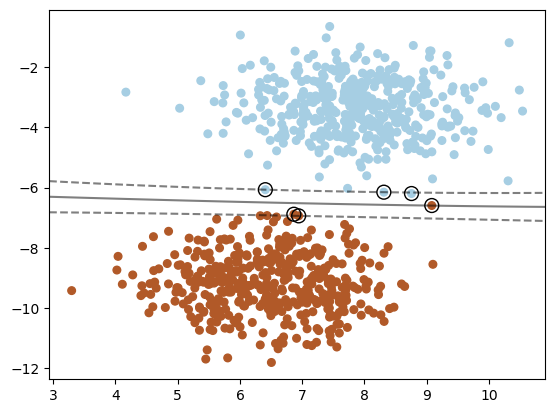

In [28]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# we create 40 separable points
X, y = make_blobs(n_samples=863, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Travail à faire
- 1) Nous aimerions bien choisir les paramètre de notre VMS ainsi que son type afin d'arriver à une limite de decision qui ressemblerai cis-bas.
- - Definir également le role de chaque paramètre.
- - Comprende et expliquer les sorties des MVS en utilisant sklearn
- - le lien peut vous aider  <link href="https://scikit-learn.org/stable/modules/svm.html" />
- 2) Nous aimerions dessiner les vecteurs de support pour notre ensemble de données.
- 3) Ce TP doit obligatoirement être accompagné d'un rapport qui devra contenir votre comprehension et analyse de ces paramètres.

<img src="goodBoundary.png" alt="Drawing" align ="left" style="width: 300px;"/>



# Introduction 
Dans ce TP nous nous concentrons sur le classifieur Machine à Vecteurs de Support (SVM), qui est un modèle d'apprentissage supervisé utilisé pour la classification de données. Nous examinons l'impact des différents types de noyaux utilisés dans le SVM sur sa capacité à séparer les classes de manière efficace.

Le SVM est particulièrement intéressant car il peut traiter à la fois des problèmes de classification linéaire et non linéaire. Pour ce faire, il utilise des noyaux qui transforment les données d'entrée dans un espace de dimension supérieure, où la séparation linéaire est possible.


#  Les paramètres de notre SVM
Nous devons sélectionner le bon type de noyau et ajuster les paramètres du SVM. Dans notre cas, nous avons utilisé les noyaux linéaire, gaussien (RBF) et polynomial. Voici le rôle de chaque paramètre :
-  Noyau : Le choix du noyau détermine la forme de la limite de décision. Le noyau linéaire crée une limite de décision linéaire, le noyau gaussien permet des frontières non linéaires et le noyau polynomial utilise un polynôme de degré spécifié pour la limite de décision.

- Paramètre C : Le paramètre de régularisation C contrôle le compromis entre la maximisation de la marge et la réduction des erreurs de classification. Une valeur plus élevée de C donne plus de poids aux erreurs de classification, ce qui conduit à un ajustement plus précis des données d'entraînement. Une valeur plus faible de C privilégie une marge plus large et une plus grande tolérance aux erreurs.

- Paramètre gamma : Cela ne s'applique qu'au noyau gaussien (RBF). Le paramètre gamma contrôle l'influence de chaque exemple d'entraînement sur la limite de décision. Une valeur plus élevée de gamma rend la limite de décision plus complexe et plus adaptée aux données d'entraînement. Cependant, une valeur trop élevée de gamma peut conduire à un surajustement.

- Paramètre degré : Cela ne s'applique qu'au noyau polynomial. Le paramètre degré contrôle le degré du polynôme utilisé pour la limite de décision. Un degré plus élevé permet une séparation plus complexe, mais peut conduire à un surajustement si le degré est trop élevé

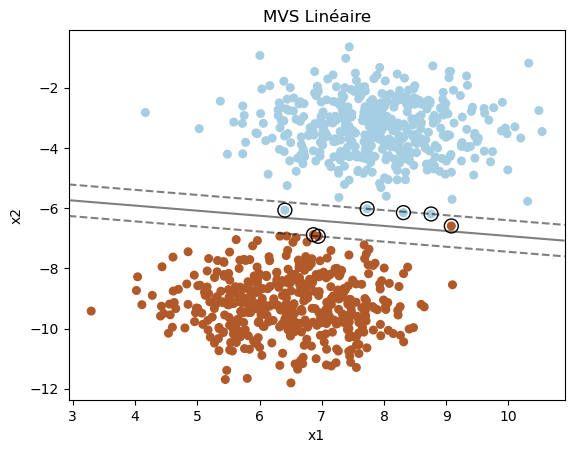

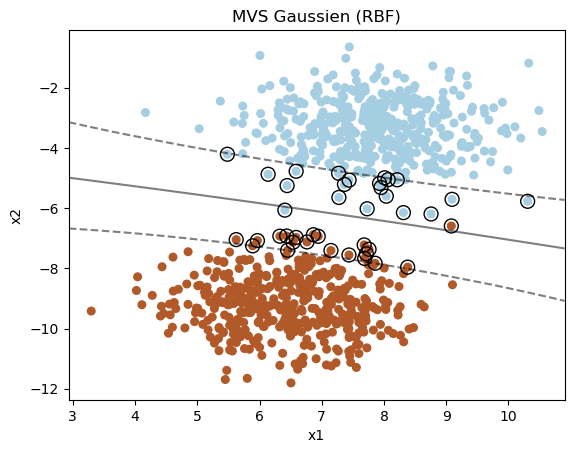

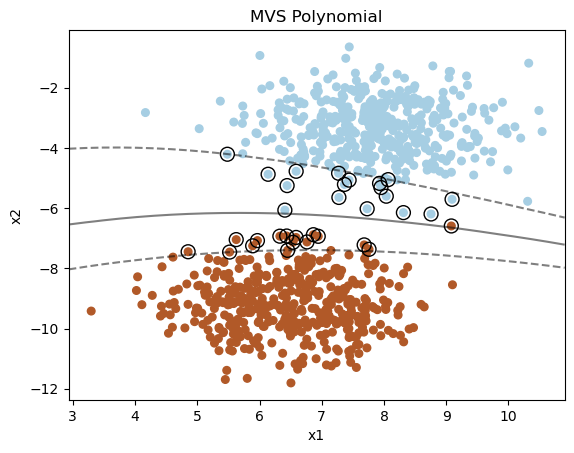

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Création des modèles SVM
models = [
    {"kernel": "linear", "label": "MVS Linéaire"},
    {"kernel": "rbf", "label": "MVS Gaussien (RBF)"},
    {"kernel": "poly", "label": "MVS Polynomial"},
]

# Tracé des graphiques
for model in models:
    clf = svm.SVC(kernel=model["kernel"], C=1.0)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=30, cmap=plt.cm.Paired)

    # Affichage de la limite de décision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

    # Affichage des vecteurs de support
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

    plt.title(model["label"])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


# Analyse des résultats
 En utilisant la bibliothèque sklearn, nous avons entraîné des modèles SVM avec différents types de noyaux et paramètres. Voici une analyse des résultats obtenus :

- MVS Linéaire : Le modèle linéaire a une limite de décision linéaire qui sépare les classes par une ligne droite. Les coefficients (w) représentent la pente de la ligne et l'ordonnée à l'origine (b) représente le point où la ligne coupe l'axe y. Les valeurs prédites sont déterminées en comparant la position d'un point par rapport à la ligne de décision. Les vecteurs de support sont les exemples d'entraînement les plus proches de la limite de décision.

- MVS Gaussien (RBF) : Le modèle gaussien a une limite de décision plus flexible qui peut prendre des formes non linéaires. Les valeurs prédites sont basées sur la distance des points par rapport à la limite de décision. Les vecteurs de support sont les exemples d'entraînement les plus influents pour la forme de la limite de décision.

- MVS Polynomial : Le modèle polynomial utilise un polynôme de degré spécifié pour la limite de décision. Un degré plus élevé permet une séparation plus complexe, mais peut conduire à un surajustement. Les vecteurs de support sont les exemples d'entraînement les plus importants pour la forme de la limite

# Conclusion 
En conclusion, le classifieur Machine à Vecteurs de Support (SVM) offre une approche puissante pour la classification de données, en particulier grâce à sa capacité à gérer à la fois des problèmes de classification linéaire et non linéaire. Dans ce TP, nous avons exploré les différents types de noyaux utilisés dans le SVM, à savoir le noyau linéaire, le noyau gaussien (RBF) et le noyau polynomial.
On peut donc conclure qu'il n'y a pas de noyau universellement meilleur, car chaque type de noyau a ses propres avantages et inconvénients.
En effet, Le noyau linéaire est efficace lorsque les classes sont linéairement séparables, dans d'autres termes, une ligne droite peut clairement séparer les exemples de différentes classes. 
Le noyau gaussien (RBF) est utile lorsque les classes sont mélangées ou lorsque la séparation entre les classes est complexe et non linéaire. Cependant, il est important de régler correctement le paramètre gamma pour éviter le surajustement.

Le noyau polynomial permet de modéliser des séparations complexes à l'aide de polynômes de degré spécifié. Il est utile lorsque la relation entre les caractéristiques et les classes suit une forme polynomiale. Cependant, un degré trop élevé peut conduire à un surajustement.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 09 Mai 2022 à 22h


In [ ]:
# bonne chance